Homework2 Angela Yu

In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv("possum.csv")

In [20]:
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy import stats

In [22]:
print(df.shape)

(104, 14)


<AxesSubplot:xlabel='totlngth', ylabel='hdlngth'>

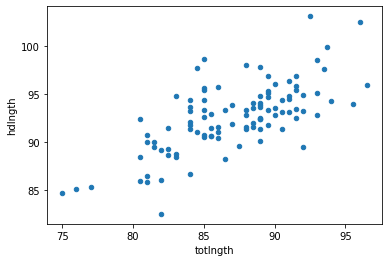

In [23]:
df.plot(kind='scatter', x='totlngth', y='hdlngth')

In [24]:
def linear_line(x, m, b):
    y = m*x + b
    return y

    y = linear_line(x, m, b)

In [28]:
 lin = stats.linregress(df["hdlngth"], df["totlngth"])

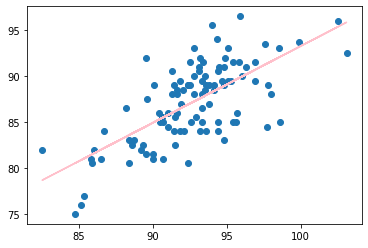

In [29]:
plt.scatter(df["hdlngth"], df["totlngth"])
plt.plot(df["hdlngth"], linear_line(df["hdlngth"], lin.slope, lin.intercept), color='pink')

1. How well does the method describe the data? The method describes the data head length is increasing with the total length.

In [ ]:
print("Train error",lin.stderr)
print("Train R-sq",lin.rvalue)

print("\nTest error",lin.stderr)
print("Test R-sq",lin.rvalue)

Train error 0.08632851506979797
Train R-sq 0.6910936973935056

Test error 0.08632851506979797
Test R-sq 0.6910936973935056


In [39]:
Maledata = df.loc[df['sex'] == "m"]

In [36]:
Femaledata = df.loc[df['sex'] == "f"]

In [37]:
 lin_F = stats.linregress(Femaledata["hdlngth"], Femaledata["totlngth"])

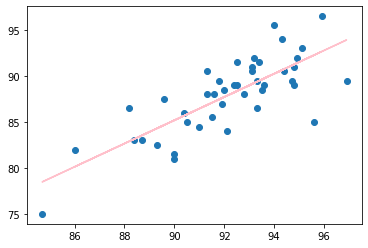

In [38]:
plt.scatter(Femaledata["hdlngth"], Femaledata["totlngth"])
plt.plot(Femaledata["hdlngth"], linear_line(Femaledata["hdlngth"], lin_F.slope, lin_F.intercept), color='pink')


In [40]:
 lin_M = stats.linregress(Maledata["hdlngth"], Maledata["totlngth"])

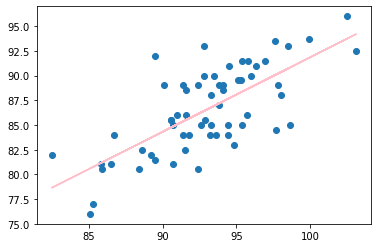

In [41]:
plt.scatter(Maledata["hdlngth"], Maledata["totlngth"])
plt.plot(Maledata["hdlngth"], linear_line(Maledata["hdlngth"], lin_M.slope, lin_M.intercept), color='pink')

2 If you perform regression for male and female possums separately, does this increase our accuracy?
It does increase our accuracy because females are increasing more than males. Males had more data point around the 90-95 while females are more recent than males.


In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [60]:
df = df.dropna()
train, test=train_test_split(df,test_size=0.2,random_state=1010)

x = train[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
y = train['totlngth'].values
y_num = train['totlngth'].values

test_x = test[['age', 'hdlngth', 'skullw', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']].values
test_y = test['totlngth'].values
test_y_num = test['totlngth'].values

print(test_y)

[88.  85.5 88.  93.  85.  89.  89.5 86.  94.  93.5 81.5 85.  82.5 91.
 86.5 84.5 86.  89.  91.  81.  92. ]


In [77]:
lasso = Lasso(alpha=1)
lasso.fit(x, y_num)

Lasso(alpha=1)

In [62]:
lasso_train= lasso.predict(x)
lasso_test= lasso.predict(test_x)

In [78]:
print(lasso.coef_)

[0.         0.44701549 0.         0.8484904  0.32963596 0.
 0.         0.         0.        ]


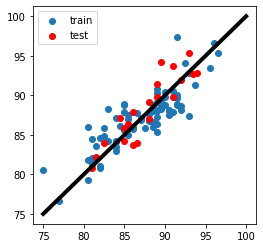

In [68]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,lasso_train, label='train')
plt.scatter(test_y_num,lasso_test,color='r', label='test')
plt.plot([75,100],[75,100],lw=4,color='black')
plt.legend()

<AxesSubplot:>

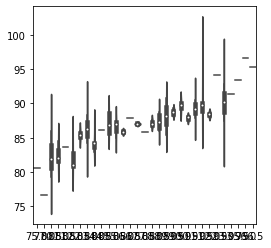

In [71]:
plt.figure(figsize=(4,4))
sns.violinplot(x=y_num,y=lasso_train,data=df)

3. What are the three best classifiers? The three best calssifiers are   0.44701549 0. ,        0.8484904 , 0.32963596 0

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [90]:
df['sex_num'] = df['sex'].replace(['m', 'f'],
                        [0, 1,], inplace=False)
df.head()

,case,site,Pop,sex,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_num
0,1,1,Vic,m,8.0,94.1,60.4,89.0,36.0,74.5,54.5,15.2,28.0,36.0,0
1,2,1,Vic,f,6.0,92.5,57.6,91.5,36.5,72.5,51.2,16.0,28.5,33.0,1
2,3,1,Vic,f,6.0,94.0,60.0,95.5,39.0,75.4,51.9,15.5,30.0,34.0,1
3,4,1,Vic,f,6.0,93.2,57.1,92.0,38.0,76.1,52.2,15.2,28.0,34.0,1
4,5,1,Vic,f,2.0,91.5,56.3,85.5,36.0,71.0,53.2,15.1,28.5,33.0,1


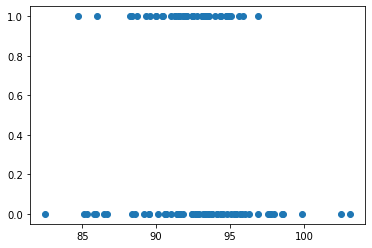

In [92]:
plt.scatter(df["hdlngth"], df["sex_num"])

In [93]:
x_train,x_test,y_train,y_test=train_test_split(df["hdlngth"],df["sex_num"],test_size=0.2,random_state=0)

In [94]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [95]:
logreg = LogisticRegression()

In [96]:
logreg.fit(x_train,y_train)

LogisticRegression()

In [97]:
from scipy.special import expit

In [98]:
x_line = np.linspace(30,110,1000)
y_line = x_line * logreg.coef_ + logreg.intercept_

In [99]:
sigmoid = expit(y_line)

Text(0, 0.5, 'sex_num')

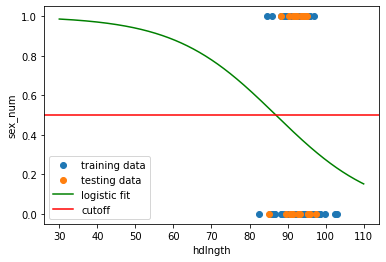

In [101]:
plt.scatter(x_train, y_train, label="training data")
plt.scatter(x_test, y_test, label="testing data")
plt.plot(x_line,sigmoid.ravel(),c="green", label = "logistic fit")
plt.axhline(.5, color="red", label="cutoff")
plt.legend()
plt.xlabel("hdlngth")
plt.ylabel("sex_num")

In [102]:
y_pred = logreg.predict(x_test)

In [103]:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

-1.1000000000000005
0.5238095238095238


In [104]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x, y_num)

KNeighborsRegressor(n_neighbors=3)

In [106]:
knn_train=knn.predict(x)
knn_test=knn.predict(test_x)

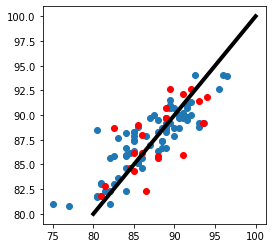

In [108]:
plt.figure(figsize=(4,4))

plt.scatter(y_num,knn_train)
plt.scatter(test_y_num,knn_test,color='r')
plt.plot([80,100],[80,100],lw=4,color='black')

4 Which appears to be more accurate? I thought the logistic regression was more easier to see. But I think the K nearest neighbors was more accurate as there were plots on what is happening.

In [109]:
from sklearn import metrics

In [110]:
conf_matrix = metrics.confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[10  1]
 [10  0]]


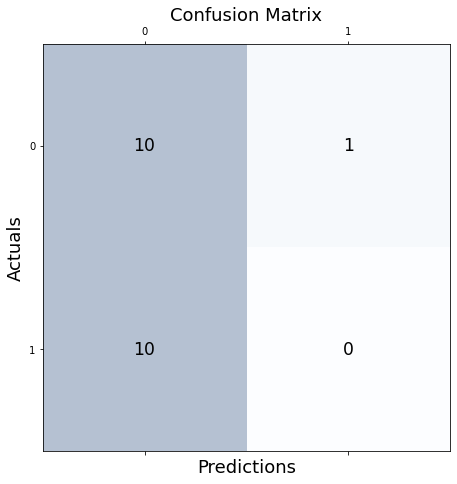

In [111]:
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()